In [225]:
import numpy as np
from MountainCarEnv import MountainCarEnv
import matplotlib.pyplot as plot

In [226]:
env = MountainCarEnv(render_mode="rbg_array")

In [227]:
pos_space = np.linspace(env.min_position, env.max_position, 20)
vel_space = np.linspace(-env.max_speed, env.max_speed, 20)
Q = np.zeros((len(pos_space), len(vel_space), env.action_space.n))


In [228]:
def epsilon_greedy_policy(state, Q, epsilon):
    explore = np.random.binomial(1, epsilon)
    if explore:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state[0], state[1]])
    return action

def get_state(obs):
    pos, vel = obs
    pos_bin = np.digitize(pos, pos_space)
    vel_bin = np.digitize(vel, vel_space)
    return pos_bin, vel_bin

def run_mountain_car(Q, epsilon, alpha, gamma):
    done = False
    totalReward = 0
    obs = env.reset()
    state = get_state(obs)
    while not done:
        action = epsilon_greedy_policy(state, Q, epsilon)
        obs, reward, done, _ = env.step(action)
        totalReward += reward
        newState = get_state(obs)
        delta = alpha * (reward + gamma * np.max(Q[newState[0], newState[1]]) - Q[state[0], state[1], action])
        Q[state[0], state[1], action] += delta
        state = newState
    return totalReward



In [229]:
numOfEpisodes = 50000
printInterval = 1000

epsilon=1
minEpsilon = 0.01
reduction = 2*epsilon/numOfEpisodes

alpha=0.1
gamma=0.5

totalRewards = np.zeros(numOfEpisodes)
totalQ = np.zeros(numOfEpisodes)

for i in range(numOfEpisodes):
    totalReward = run_mountain_car(Q, epsilon, alpha, gamma)
    totalRewards[i] = totalReward
    totalQ[i] = np.mean(Q)
    if epsilon > minEpsilon:
        epsilon -= reduction
    if (i+1) % printInterval == 0:
        print(f"Episode {i+1} out of {numOfEpisodes}; Reward {totalReward}; Epsilon {epsilon}")


# falta el test



Episode 1000 out of 50000; Reward -500.0; Epsilon 0.95999999999996
Episode 2000 out of 50000; Reward -500.0; Epsilon 0.91999999999992
Episode 3000 out of 50000; Reward -500.0; Epsilon 0.87999999999988
Episode 4000 out of 50000; Reward -500.0; Epsilon 0.83999999999984
Episode 5000 out of 50000; Reward -500.0; Epsilon 0.7999999999998
Episode 6000 out of 50000; Reward -500.0; Epsilon 0.75999999999976
Episode 7000 out of 50000; Reward -500.0; Epsilon 0.71999999999972
Episode 8000 out of 50000; Reward -500.0; Epsilon 0.67999999999968
Episode 9000 out of 50000; Reward -457.0; Epsilon 0.63999999999964
Episode 10000 out of 50000; Reward -393.0; Epsilon 0.5999999999996
Episode 11000 out of 50000; Reward -236.0; Epsilon 0.55999999999956
Episode 12000 out of 50000; Reward -500.0; Epsilon 0.51999999999952
Episode 13000 out of 50000; Reward -362.0; Epsilon 0.47999999999950776
Episode 14000 out of 50000; Reward -407.0; Epsilon 0.4399999999995233
Episode 15000 out of 50000; Reward -338.0; Epsilon 0.3

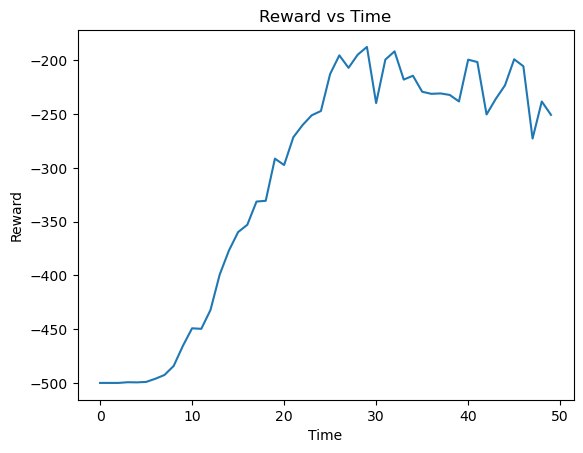

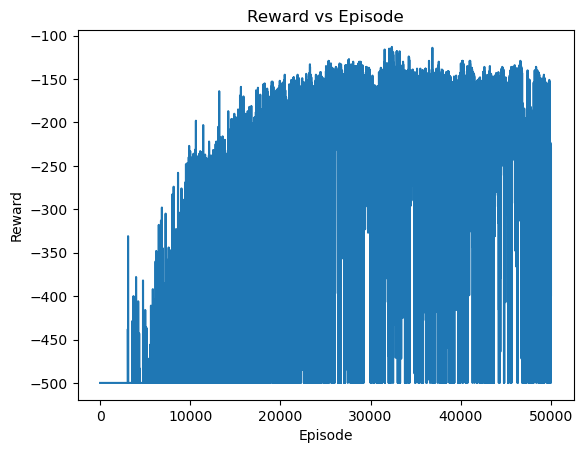

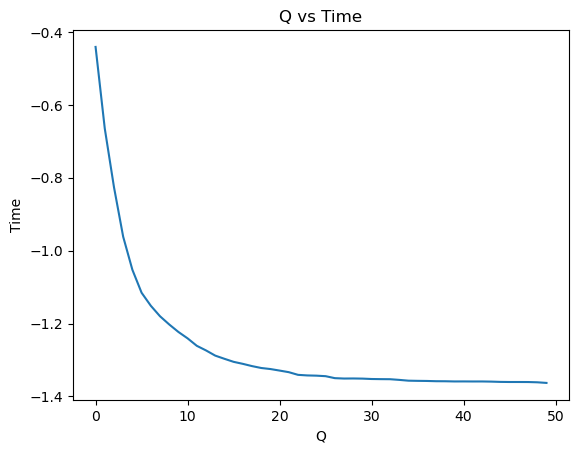

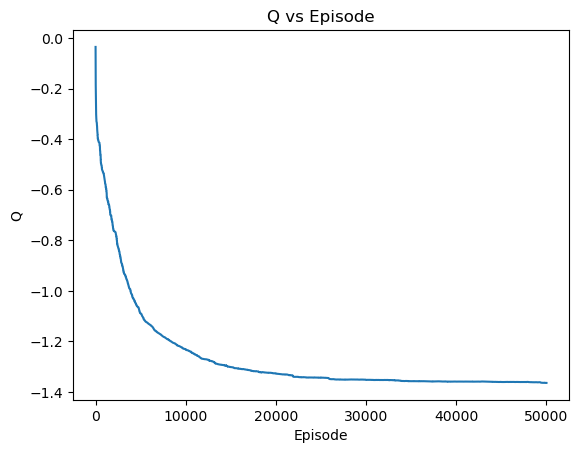

In [230]:
continuousInterval = 1000
avgRewards = np.zeros((int)(numOfEpisodes/continuousInterval))
avgQ = np.zeros((int)(numOfEpisodes/continuousInterval))

for i in range(numOfEpisodes):
    if (i+1) % continuousInterval == 0:
        index = (int)(i/continuousInterval)
        avgQ[index] = np.mean(totalQ[i+1-continuousInterval:i+1])
        avgRewards[index] = np.mean(totalRewards[i+1-continuousInterval:i+1])



plot.plot(avgRewards)
plot.xlabel("Time")
plot.ylabel("Reward")
plot.title("Reward vs Time")
plot.show()
plot.close()

plot.plot(totalRewards)
plot.xlabel("Episode")
plot.ylabel("Reward")
plot.title("Reward vs Episode")
plot.show()
plot.close()


plot.plot(avgQ)
plot.xlabel("Q")
plot.ylabel("Time")
plot.title("Q vs Time")
plot.show()
plot.close()

plot.plot(totalQ)
plot.xlabel("Episode")
plot.ylabel("Q")
plot.title("Q vs Episode")
plot.show()
plot.close()


